In [1]:
import pandas as pd
import numpy as np

import matplotlib as pyplot
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

## Review the data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# Clear null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
null_values = ['Product_Category_2', 'Product_Category_3'] 
for nv in null_values:
    df[nv].fillna(df[nv].value_counts().idxmax(), inplace=True)

In [8]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

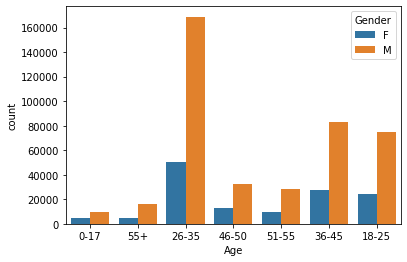

In [9]:
sns.countplot(df['Age'], hue=df['Gender'])

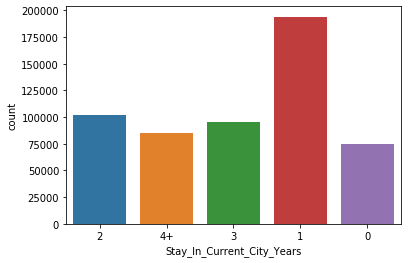

In [10]:
sns.countplot(df['Stay_In_Current_City_Years'])

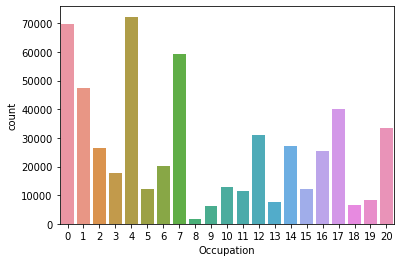

In [11]:
sns.countplot(df['Occupation'])

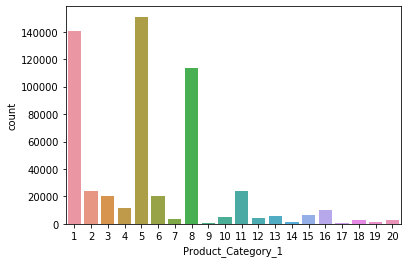

In [12]:
sns.countplot(df['Product_Category_1'])

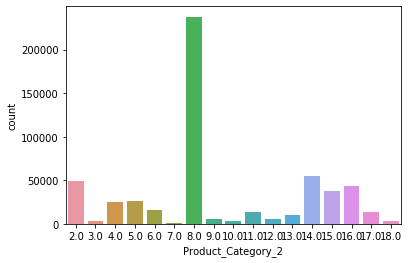

In [13]:
sns.countplot(df['Product_Category_2'])

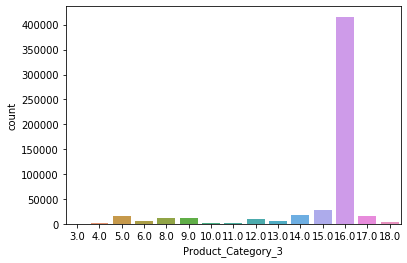

In [14]:
sns.countplot(df['Product_Category_3'])

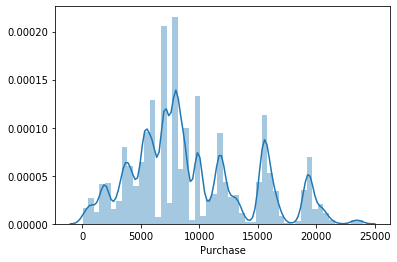

In [15]:
sns.distplot(df['Purchase'])

We have labeled data - can use supervised learning
We want to predict how much $$$ people spend - regression task

When we think about sales - consider demographic (age/gender/income/home), store (location/size/ads/product stock)

In [16]:
print(df['Product_ID'].unique())
print(len(df['Product_ID'].unique()))

['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
3631


## Prepare data

In [17]:
X = df.drop(["Purchase"], axis=1)

In [18]:
for cat in ['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years']:
    tmp = pd.get_dummies(X[cat], prefix=cat, drop_first=True)
    X.drop(cat, axis=1, inplace=True)
    X = pd.concat([X, tmp], axis=1)

In [19]:
X['Gender'] = pd.get_dummies(X['Gender'], drop_first=True)

In [20]:
from sklearn.preprocessing import LabelEncoder

for c in ['Product_ID']:
    enc = LabelEncoder()
    X[c] = enc.fit_transform(X[c])

In [21]:
X.head()

,User_ID,Product_ID,Gender,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_18-25,Age_26-35,Age_36-45,...,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,672,0,0,3,8.0,16.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1000001,2376,0,0,1,6.0,14.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1000001,852,0,0,12,8.0,16.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1000001,828,0,0,12,14.0,16.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1000002,2734,1,0,8,8.0,16.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        550068 non-null  int64  
 1   Product_ID                     550068 non-null  int32  
 2   Gender                         550068 non-null  uint8  
 3   Marital_Status                 550068 non-null  int64  
 4   Product_Category_1             550068 non-null  int64  
 5   Product_Category_2             550068 non-null  float64
 6   Product_Category_3             550068 non-null  float64
 7   Age_18-25                      550068 non-null  uint8  
 8   Age_26-35                      550068 non-null  uint8  
 9   Age_36-45                      550068 non-null  uint8  
 10  Age_46-50                      550068 non-null  uint8  
 11  Age_51-55                      550068 non-null  uint8  
 12  Age_55+                       

In [23]:
y = df["Purchase"]

In [24]:
X = X.drop(["User_ID"], axis=1)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

## Do ML part

In [27]:
import sklearn
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import svm

In [28]:
from sklearn import metrics

def get_metrics(reg, y_test, y_pred):
    res = []
    
    res.append(str(reg.__class__.__name__))
    mae = metrics.mean_absolute_error(y_test, y_pred)
    res.append(mae)
    mse = metrics.mean_squared_error(y_test, y_pred)
    res.append(mse)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    res.append(rmse)
    r2 = metrics.r2_score(y_test, y_pred)
    res.append(r2)
    
    return res
               
def show_metrics(res):
    print(res[0])
    print(' MAE : ', res[1])
    print(' MSE : ', res[2])
    print(' RMSE: ', res[3])
    print(' R^2 : ', res[4])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 1/3, random_state = 0)

In [30]:
# Start with plolynomial regression
pf = PolynomialFeatures(degree=2)
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.fit_transform(X_test)

In [31]:
lr = LinearRegression()
lr.fit(X_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = lr.predict(X_poly_test)
print(y_pred)

[12921.21484375  5155.04296875  8420.54296875 ...  7227.00390625
  7297.9609375  12504.53515625]


In [33]:
results = []
m = get_metrics(lr, y_test, y_pred)
m[0] = 'PolynomialRegression'
show_metrics(m)
results.append(m)

PolynomialRegression
 MAE :  3268.125271521828
 MSE :  18975006.25354814
 RMSE:  4356.031020728404
 R^2 :  0.24982786428559145


In [34]:
regressors = [
    Ridge(alpha=.5),
    Lasso(alpha=0.1),
    LinearRegression(), 
    DecisionTreeRegressor(), 
    # RandomForestRegressor(),
    GradientBoostingRegressor(), 
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, 
                     max_depth = 5, alpha = 10, n_estimators = 10), 
    # svm.SVC(kernel='rbf', gamma=0.7, C=1.0),
    # KNeighborsRegressor(n_neighbors=3)
]

### Commented out regressors are processing over 100 minutes

In [35]:
for r in regressors: 
    print('======================================================================================')
    print('Running %s' % (r))
    r.fit(X_train, y_train)
    # print('Accuracy score for %s is %s' % (r, r.score(X_test, y_test) * 100))
    m = get_metrics(r, y_test, r.predict(X_test))
    show_metrics(m)
    results.append(m)
    print('======================================================================================')
    print('')

Running Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Ridge
 MAE :  3574.465096904877
 MSE :  21788079.702849247
 RMSE:  4667.7703138489205
 R^2 :  0.13861370766368775

Running Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso
 MAE :  3574.465697844052
 MSE :  21788078.015116964
 RMSE:  4667.770133063213
 R^2 :  0.13861377438776235

Running LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
LinearRegression
 MAE :  3574.4648046029615
 MSE :  21788079.712582797
 RMSE:  4667.770314891554
 R^2 :  0.13861370727887412

Running DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=Non

## Try ANN

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [37]:
model = Sequential()
model.add(Dense(38, input_dim=38, kernel_initializer='normal', activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='relu'))

optimizer = Adam(lr=0.35)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae'])

In [38]:
model.fit(X_train, y_train, epochs=300, batch_size=5000, verbose=1)

Epoch 1/300
366712/366712 [==============================] - 1s 1us/step - loss: 57310498.3392 - mse: 57310492.0000 - mae: 5721.3047
Epoch 2/300
366712/366712 [==============================] - 0s 1us/step - loss: 19540834.9576 - mse: 19540834.0000 - mae: 3282.8831
Epoch 3/300
366712/366712 [==============================] - 0s 1us/step - loss: 17983677.3339 - mse: 17983678.0000 - mae: 3123.5078
Epoch 4/300
366712/366712 [==============================] - 0s 1us/step - loss: 17652403.8446 - mse: 17652406.0000 - mae: 3094.4150
Epoch 5/300
366712/366712 [==============================] - 0s 1us/step - loss: 17569257.2119 - mse: 17569256.0000 - mae: 3084.1479
Epoch 6/300
366712/366712 [==============================] - 0s 1us/step - loss: 17131709.5134 - mse: 17131708.0000 - mae: 3051.0593
Epoch 7/300
366712/366712 [==============================] - 0s 1us/step - loss: 16616558.9389 - mse: 16616559.0000 - mae: 3022.9678
Epoch 8/300
366712/366712 [==============================] - 0s 1us/s

Epoch 124/300
366712/366712 [==============================] - 0s 1us/step - loss: 9704862.5747 - mse: 9704864.0000 - mae: 2332.1787
Epoch 125/300
366712/366712 [==============================] - 0s 1us/step - loss: 9317991.1936 - mse: 9317993.0000 - mae: 2292.0200
Epoch 126/300
366712/366712 [==============================] - 0s 1us/step - loss: 9419798.3003 - mse: 9419798.0000 - mae: 2300.4307
Epoch 127/300
366712/366712 [==============================] - 0s 1us/step - loss: 9289346.5033 - mse: 9289349.0000 - mae: 2285.6860
Epoch 128/300
366712/366712 [==============================] - 0s 1us/step - loss: 9420672.1092 - mse: 9420671.0000 - mae: 2300.7307
Epoch 129/300
366712/366712 [==============================] - 0s 1us/step - loss: 9295702.7415 - mse: 9295702.0000 - mae: 2289.1143
Epoch 130/300
366712/366712 [==============================] - 0s 1us/step - loss: 9378706.1113 - mse: 9378708.0000 - mae: 2296.1885
Epoch 131/300
366712/366712 [==============================] - 0s 1us

366712/366712 [==============================] - 0s 1us/step - loss: 9218723.5758 - mse: 9218725.0000 - mae: 2274.9956
Epoch 247/300
366712/366712 [==============================] - 0s 1us/step - loss: 9349104.5323 - mse: 9349104.0000 - mae: 2289.4460
Epoch 248/300
366712/366712 [==============================] - 0s 1us/step - loss: 9312938.3900 - mse: 9312940.0000 - mae: 2288.6909
Epoch 249/300
366712/366712 [==============================] - 0s 1us/step - loss: 9186394.9982 - mse: 9186393.0000 - mae: 2271.7559
Epoch 250/300
366712/366712 [==============================] - 0s 1us/step - loss: 9221117.8425 - mse: 9221118.0000 - mae: 2274.8083
Epoch 251/300
366712/366712 [==============================] - 0s 1us/step - loss: 9470471.4118 - mse: 9470470.0000 - mae: 2304.8586
Epoch 252/300
366712/366712 [==============================] - 0s 1us/step - loss: 9235568.9370 - mse: 9235569.0000 - mae: 2279.0486
Epoch 253/300
366712/366712 [==============================] - 0s 1us/step - loss: 

In [39]:
m = get_metrics(model, y_test, model.predict(X_test))
m[0] = 'ANN'
show_metrics(m)
results.append(m)

ANN
 MAE :  2287.662221144573
 MSE :  9107340.044901585
 RMSE:  3017.8369811674033
 R^2 :  0.6399435846887456


In [40]:
res = pd.DataFrame(np.array(results))
res.columns = ['Name', 'MAE', 'MSE', 'RMSE', 'R^2']

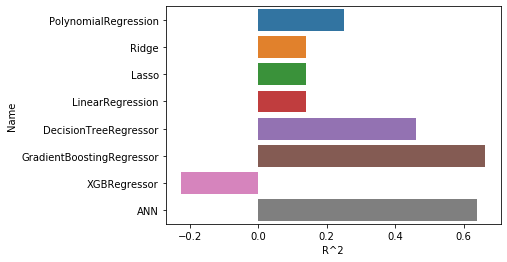

In [41]:
sns.barplot(data=res, y='Name', x='R^2')